In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Load the dataset
df = pd.read_csv('/content/EV_cars.csv')

# Display column names
print(df.columns)

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [ ]:
#shows the dimensions of the dataset
df.shape

(360, 9)

In [ ]:
# Rename columns if necessary
df.rename(columns={'acceleration..0.100.': 'acceleration_0_100'}, inplace=True)

# Now access the columns with the updated names
df_x = df[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration_0_100']]


In [ ]:
df.isnull().sum()

Battery                0
Car_name               0
Car_name_link          0
Efficiency             0
Fast_charge            2
Price.DE.             51
Range                  0
Top_speed              0
acceleration_0_100     0
dtype: int64

In [ ]:
df['Price.DE.'] = df['Price.DE.'].fillna(df['Price.DE.'].mean())
df['Fast_charge'] = df['Fast_charge'].fillna(df['Fast_charge'].mean())


In [ ]:
# Perform PCA
df_pca = PCA()
df_pca.fit(df_x)

# Print summary
print("PCA Summary:")
print("Standard deviation", df_pca.explained_variance_)
print("Proportion of variance ", df_pca.explained_variance_ratio_)
print("Cumulative proportion of variance ", df_pca.explained_variance_ratio_.cumsum())
# Print PCA with specified number of digits
np.set_printoptions(precision=1)
print(df_pca)


PCA Summary:
Standard deviation [1.02167314e+09 4.06769652e+04 5.10224878e+03 7.75545907e+02
 3.29199598e+02 8.46525870e+00 1.76655196e+00]
Proportion of variance  [9.99954103e-01 3.98122418e-05 4.99378362e-06 7.59059114e-07
 3.22201372e-07 8.28530164e-09 1.72899805e-09]
Cumulative proportion of variance  [0.9999541  0.99999391 0.99999891 0.99999967 0.99999999 1.
 1.        ]
PCA()


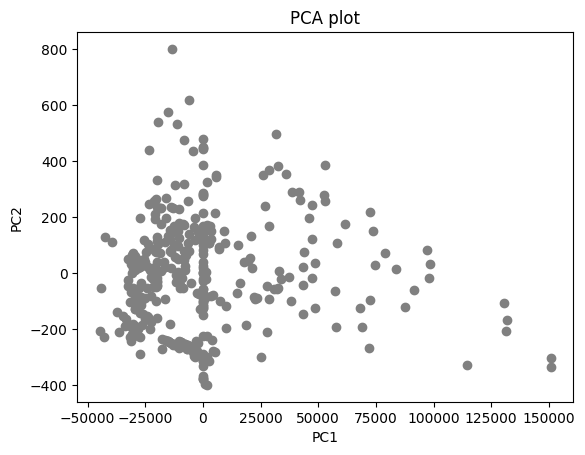

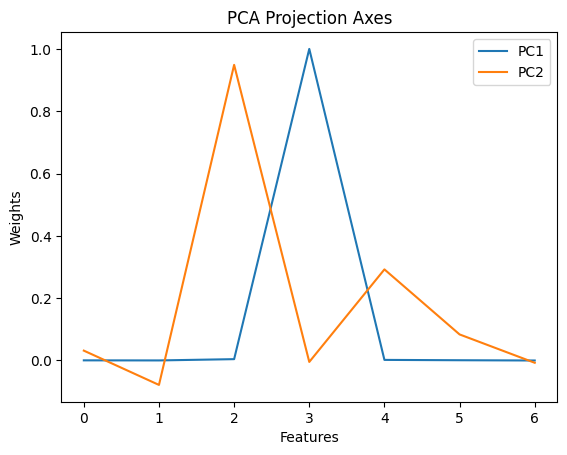

In [ ]:
# Plot PCA
pca_scores = df_pca.transform(df_x)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

# Plot PCA axes
plt.figure()
plt.plot(df_pca.components_[0], label='PC1')
plt.plot(df_pca.components_[1], label='PC2')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('PCA Projection Axes')
plt.legend()
plt.show()


In [ ]:
# Perform K-means clustering
np.random.seed(1234)
inertia_values = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df_x)
    inertia_values.append(kmeans.inertia_)

# Relabel clusters
best_k = inertia_values.index(min(inertia_values)) + 2
kmeans_best = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
df_kmeans = kmeans_best.fit_predict(df_x)
df_kmeans += 1

print("Cluster labels:")
print(df_kmeans)



Cluster labels:
[1 8 8 4 1 8 6 4 4 1 1 8 1 8 6 8 6 2 6 6 4 6 7 4 4 4 6 6 4 4 6 5 8 4 8 8 1
 7 7 4 6 8 8 8 4 4 6 4 5 4 8 6 4 1 1 6 1 4 1 4 6 6 8 6 6 4 6 3 8 6 6 8 8 8
 4 7 1 8 8 8 6 4 6 8 8 1 2 6 1 1 8 7 2 1 4 4 6 6 4 1 4 6 6 7 1 1 8 2 1 8 8
 6 7 1 1 8 5 4 8 8 4 1 4 6 8 5 7 8 8 4 1 5 8 8 4 6 4 6 6 7 8 4 6 1 6 8 8 3
 2 8 6 7 6 4 7 6 8 6 1 4 7 4 1 1 7 6 6 6 6 4 5 8 8 6 2 4 4 4 8 6 4 4 4 2 6
 2 6 1 1 1 1 6 5 4 4 4 4 1 6 6 7 6 1 6 8 2 7 5 6 7 3 8 8 2 1 6 6 4 4 7 4 6
 1 6 4 4 2 6 4 7 6 3 8 7 6 6 8 6 6 6 6 1 6 4 8 6 6 4 1 1 6 6 1 6 5 1 7 1 1
 6 4 7 2 6 4 8 6 6 2 2 7 7 1 2 6 1 6 8 7 7 1 6 8 4 6 4 2 6 4 2 1 2 1 6 1 4
 5 6 8 6 6 6 8 1 2 6 5 1 4 1 6 2 1 7 6 6 1 4 6 6 1 7 1 1 5 5 1 6 1 3 8 4 7
 6 6 3 1 8 6 6 1 2 8 6 2 8 1 1 1 5 6 1 8 6 1 1 1 8 6 1]


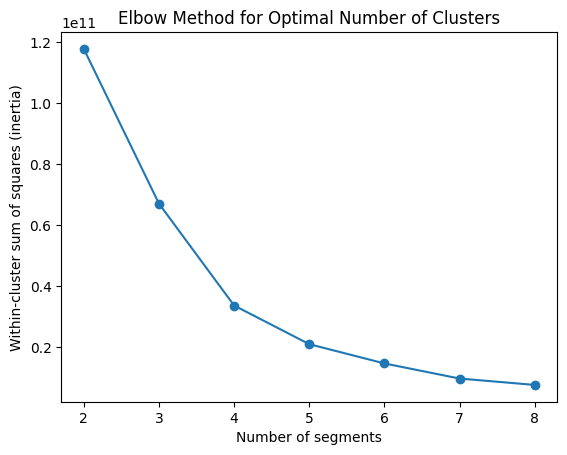

In [ ]:
# Plot the elbow curve
plt.plot(range(2, 9), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares (inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# Define bootstrap function
def bootstrap_clustering(data, k_range, n_rep, n_boot):
    bootstrap_results = []
    for _ in range(n_boot):
        sample_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
        bootstrap_data = data.iloc[sample_indices]
        inertia_values = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
            kmeans.fit(bootstrap_data)
            inertia_values.append(kmeans.inertia_)
        bootstrap_results.append(inertia_values)
    return np.array(bootstrap_results)

# Perform bootstrapping
df_boot_results = bootstrap_clustering(df_x, range(2, 9), n_rep=10, n_boot=100)

# Display bootstrap results
print("Bootstrap results shape:", df_boot_results.shape)


Bootstrap results shape: (100, 7)


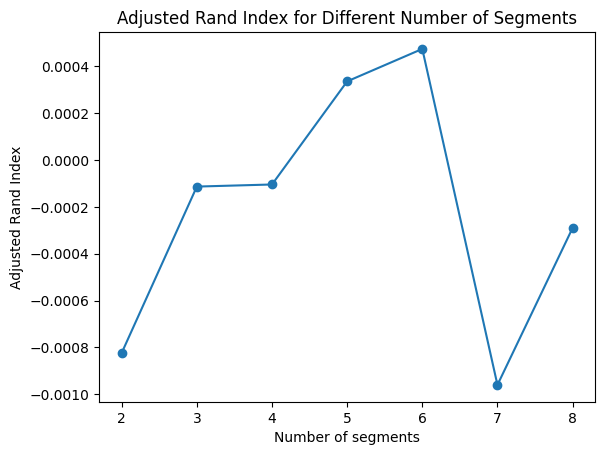

In [ ]:
# Define function to compute adjusted Rand index for K-means clustering
def compute_adjusted_rand_index(data, k_range, n_rep, n_boot):
    adjusted_rand_indices = []
    for k in k_range:
        rand_indices = []
        for _ in range(n_boot):
            sample_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
            bootstrap_data = data.iloc[sample_indices]
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
            cluster_labels = kmeans.fit_predict(bootstrap_data)
            true_labels = np.random.choice(range(k), size=len(cluster_labels))
            rand_index = adjusted_rand_score(true_labels, cluster_labels)
            rand_indices.append(rand_index)
        avg_rand_index = np.mean(rand_indices)
        adjusted_rand_indices.append(avg_rand_index)
    return adjusted_rand_indices

# Compute adjusted Rand index for each number of segments
k_range = range(2, 9)
adjusted_rand_indices = compute_adjusted_rand_index(df_x, k_range, n_rep=10, n_boot=100)

# Plot adjusted Rand index versus number of segments
plt.plot(k_range, adjusted_rand_indices, marker='o', linestyle='-')
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Different Number of Segments')
plt.show()

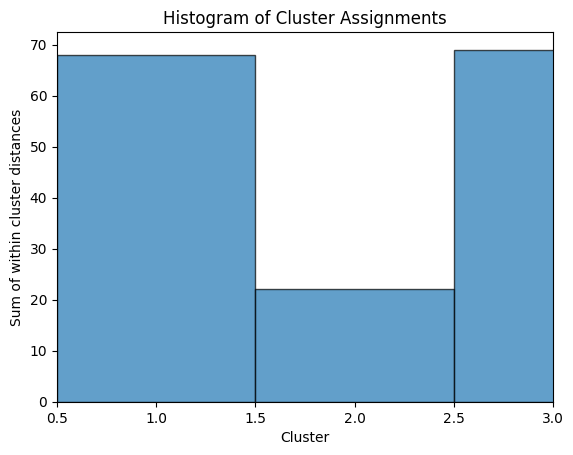

In [ ]:
# Plot histogram of cluster assignments
plt.hist(df_kmeans, bins=range(5), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Sum of within cluster distances')
plt.xlim(0.5, 3)
plt.title('Histogram of Cluster Assignments')
plt.show()

In [ ]:
# Extract cluster assignments for the specific number of segments (4 in this case)
df_k4 = df_kmeans

print("Cluster assignments for k=4:")
print(df_k4)

Cluster assignments for k=4:
[1 8 8 4 1 8 6 4 4 1 1 8 1 8 6 8 6 2 6 6 4 6 7 4 4 4 6 6 4 4 6 5 8 4 8 8 1
 7 7 4 6 8 8 8 4 4 6 4 5 4 8 6 4 1 1 6 1 4 1 4 6 6 8 6 6 4 6 3 8 6 6 8 8 8
 4 7 1 8 8 8 6 4 6 8 8 1 2 6 1 1 8 7 2 1 4 4 6 6 4 1 4 6 6 7 1 1 8 2 1 8 8
 6 7 1 1 8 5 4 8 8 4 1 4 6 8 5 7 8 8 4 1 5 8 8 4 6 4 6 6 7 8 4 6 1 6 8 8 3
 2 8 6 7 6 4 7 6 8 6 1 4 7 4 1 1 7 6 6 6 6 4 5 8 8 6 2 4 4 4 8 6 4 4 4 2 6
 2 6 1 1 1 1 6 5 4 4 4 4 1 6 6 7 6 1 6 8 2 7 5 6 7 3 8 8 2 1 6 6 4 4 7 4 6
 1 6 4 4 2 6 4 7 6 3 8 7 6 6 8 6 6 6 6 1 6 4 8 6 6 4 1 1 6 6 1 6 5 1 7 1 1
 6 4 7 2 6 4 8 6 6 2 2 7 7 1 2 6 1 6 8 7 7 1 6 8 4 6 4 2 6 4 2 1 2 1 6 1 4
 5 6 8 6 6 6 8 1 2 6 5 1 4 1 6 2 1 7 6 6 1 4 6 6 1 7 1 1 5 5 1 6 1 3 8 4 7
 6 6 3 1 8 6 6 1 2 8 6 2 8 1 1 1 5 6 1 8 6 1 1 1 8 6 1]


In [ ]:

# Group the data by cluster and calculate mean values for each feature
cluster_means = pd.DataFrame(df_x)
cluster_means['Cluster'] = df_kmeans
cluster_means = cluster_means.groupby('Cluster').mean()

# Display the mean values for each cluster
print("Mean values for each feature within each cluster:")
print(cluster_means)

Mean values for each feature within each cluster:
           Battery  Efficiency  Fast_charge      Price.DE.       Range  \
Cluster                                                                  
1        71.110294  206.588235   524.852941   57013.014706  360.882353   
2        95.000000  194.636364   844.545455  115032.227273  492.500000   
3        98.133333  194.666667   913.333333  202233.333333  512.500000   
4        46.076190  173.000000   366.601933   37010.841270  266.984127   
5        96.228571  202.928571   893.571429  148573.571429  477.857143   
6        76.130303  205.181818   541.919192   68130.005296  378.939394   
7        93.035714  202.321429   700.000000   92794.857143  460.000000   
8        62.021667  184.116667   507.666667   47321.816667  345.583333   

          Top_speed  acceleration_0_100  
Cluster                                  
1        166.588235            8.239706  
2        224.727273            4.500000  
3        260.000000            2.966667  

In [ ]:
# Fit Gaussian Mixture Model
gmm_models = []
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(df_x)
    gmm_models.append(gmm)

# Display fitted models
for i, gmm in enumerate(gmm_models):
    print(f"Number of components: {i + 2}")
    print(gmm)
    print()


Number of components: 2
GaussianMixture(n_components=2, n_init=10, random_state=1234)

Number of components: 3
GaussianMixture(n_components=3, n_init=10, random_state=1234)

Number of components: 4
GaussianMixture(n_components=4, n_init=10, random_state=1234)

Number of components: 5
GaussianMixture(n_components=5, n_init=10, random_state=1234)

Number of components: 6
GaussianMixture(n_components=6, n_init=10, random_state=1234)

Number of components: 7
GaussianMixture(n_components=7, n_init=10, random_state=1234)

Number of components: 8
GaussianMixture(n_components=8, n_init=10, random_state=1234)



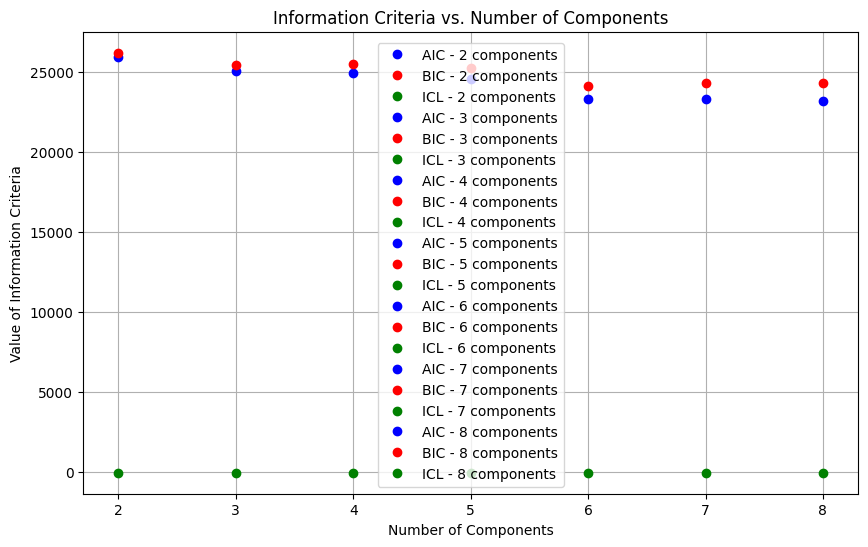

In [ ]:
# Fit Gaussian Mixture Models for a range of components
models = {}
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(df_x)
    models[n_components] = gmm

# Plot AIC, BIC, and ICL
plt.figure(figsize=(10, 6))
for n_components, model in models.items():
    plt.plot(n_components, model.aic(df_x), 'bo', label=f'AIC - {n_components} components')
    plt.plot(n_components, model.bic(df_x), 'ro', label=f'BIC - {n_components} components')
    plt.plot(n_components, model.lower_bound_, 'go', label=f'ICL - {n_components} components')

plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Fit Gaussian Mixture Model with the desired number of components (e.g., 4)
gmm_model_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_model_4.fit(df_x)

# Obtain cluster assignments from the mixture model
df_m4_clusters = gmm_model_4.predict(df_x)

# Compare cluster assignments between K-means and the selected mixture model
cluster_comparison = pd.DataFrame({'kmeans': df_k4, 'mixture': df_m4_clusters})

# Display the comparison
print("Comparison of cluster assignments:")
print(cluster_comparison)

Comparison of cluster assignments:
     kmeans  mixture
0         1        3
1         8        3
2         8        3
3         4        3
4         1        1
..      ...      ...
355       1        0
356       1        0
357       8        0
358       6        0
359       1        0

[360 rows x 2 columns]


In [ ]:
# Initialize Gaussian Mixture Models with the cluster assignments
gmm_model_4a = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_model_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)

# Fit the models
gmm_model_4a.fit(df_x)
gmm_model_4.fit(df_x)

# Compute the log-likelihoods
log_likelihood_4a = gmm_model_4a.score(df_x)
log_likelihood_4 = gmm_model_4.score(df_x)

# Calculate degrees of freedom
num_samples, num_features = df_x.shape
df = num_samples * num_features

# Print the results
print("Log Likelihood for MD_m4a:", log_likelihood_4a)
print("Log Likelihood for MD_m4:", log_likelihood_4)
print("Degrees of Freedom:", df)


Log Likelihood for MD_m4a: -34.210301235576
Log Likelihood for MD_m4: -34.210301235576
Degrees of Freedom: 2520


In [ ]:
df_x.head()

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration_0_100
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4


In [ ]:
# Perform segment extraction based on battery and efficiency
criteria = (df_x['Battery'] > 50) & (df_x['Efficiency'] < 150)
df_segment = df_x.loc[criteria, ['Battery', 'Efficiency', 'Range']]
print(df_segment)
print(df_segment.describe())


    Battery  Efficiency  Range
1      57.5         137    420
4      75.0         149    505
56     74.0         149    495
79     54.0         148    365
        Battery  Efficiency       Range
count   4.00000     4.00000    4.000000
mean   65.12500   145.75000  446.250000
std    10.92684     5.85235   66.128032
min    54.00000   137.00000  365.000000
25%    56.62500   145.25000  406.250000
50%    65.75000   148.50000  457.500000
75%    74.25000   149.00000  497.500000
max    75.00000   149.00000  505.000000


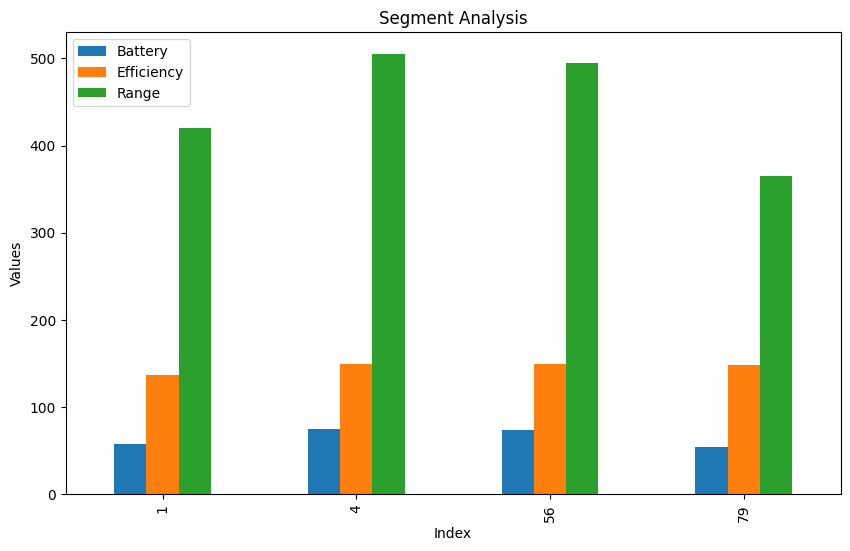

In [ ]:
# Plotting the extracted segment as a bar plot
df_segment.plot(kind='bar', figsize=(10, 6))
plt.title('Segment Analysis')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()